# Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation.

In [72]:
#importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes='True')
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import recall_score, precision_score, f1_score, roc_auc_score,accuracy_score

In [73]:
#Load dataset

df=pd.read_csv('Bank_Personal_Loan_Modelling.xls')

In [74]:
#Check the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [75]:
df.shape

(5000, 14)

In [76]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [77]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


## Insights:
1. No null values present in dataset
2. Experience column contains false data (min value of -3)

In [110]:
#Correcting false data
print(df[df['Experience']<0].shape)

df[(df['Experience']<0)&(df['Personal Loan']==1)].shape

(0, 14)


(0, 14)

In [79]:
#Since only 52 entries have false data (~1%) and none of them availed a personal loan previously, they are dropped.
df.drop(df[df['Experience']<0].index,inplace=True)
df.shape


(4948, 14)

# 2. EDA: Study the data distribution in each attribute and target variable, share your findings

In [80]:
#Number of unique values in each column
df.nunique()

ID                    4948
Age                     44
Experience              44
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [81]:
#Number of people with zero mortgage
df[df['Mortgage']==0].shape

(3422, 14)

In [82]:
#Number of people with zero credit card spending per month
df[df['CCAvg']==0].shape

(106, 14)

In [83]:
#Value counts of all categorical columns.
print(df['Family'].value_counts())
print(df['Education'].value_counts())
print(df['Personal Loan'].value_counts())
print(df['Securities Account'].value_counts())
print(df['CD Account'].value_counts())
print(df['Online'].value_counts())
print(df['CreditCard'].value_counts())


1    1470
2    1274
4    1203
3    1001
Name: Family, dtype: int64
1    2080
3    1481
2    1387
Name: Education, dtype: int64
0    4468
1     480
Name: Personal Loan, dtype: int64
0    4432
1     516
Name: Securities Account, dtype: int64
0    4646
1     302
Name: CD Account, dtype: int64
1    2954
0    1994
Name: Online, dtype: int64
0    3493
1    1455
Name: CreditCard, dtype: int64


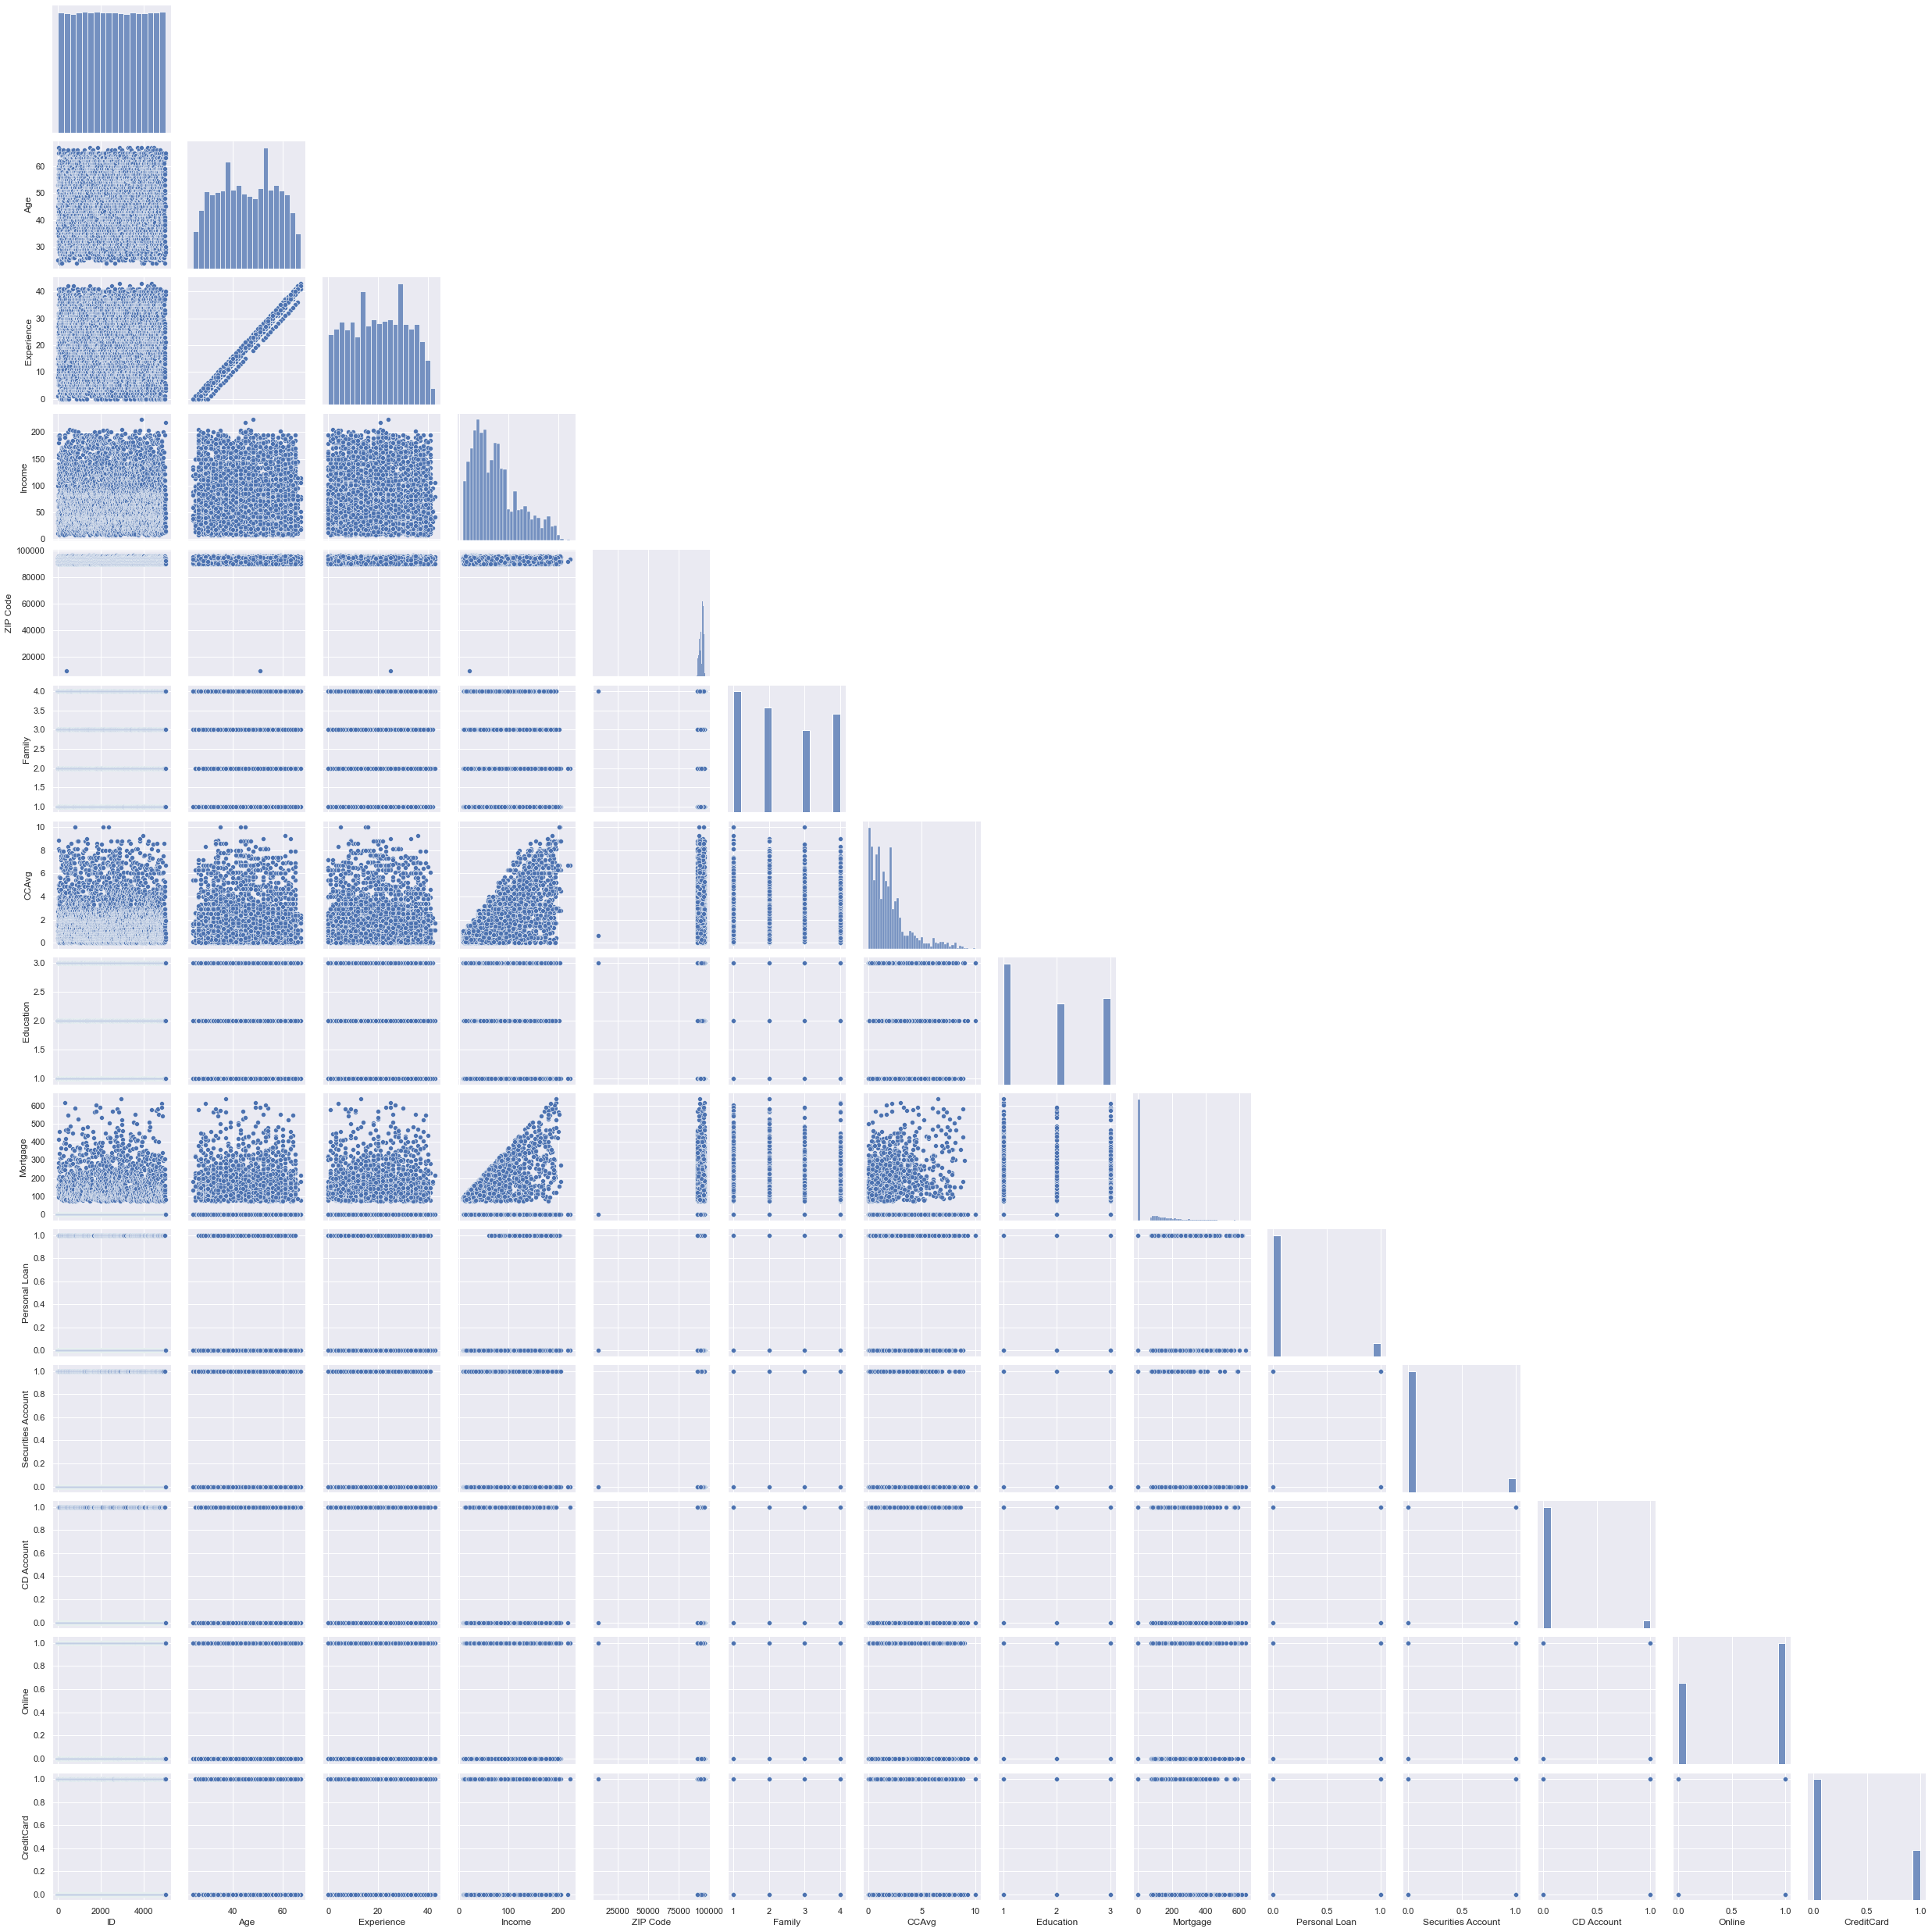

In [84]:
#Univariate and Bivariate plots
sns.pairplot(df,corner=True)

<AxesSubplot:>

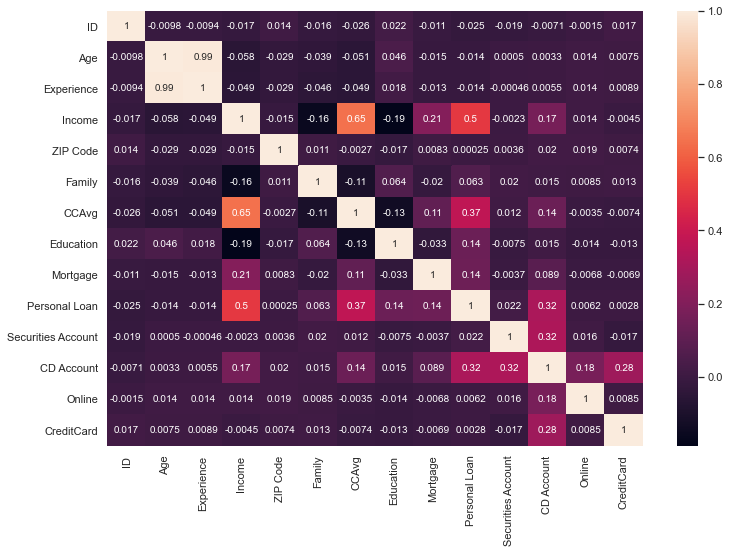

In [85]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

In [86]:
X = df.drop(columns='Personal Loan')
X = X.drop(columns='ID')
X = X.drop(columns='ZIP Code')
Y = df['Personal Loan']
X = pd.get_dummies(X,columns=['Education'])
X = pd.get_dummies(X,columns=['Family'])
#Prepping dataframes for splitting



# Split the data into training and test set in the ratio of 70:30 respectively 

In [87]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=420)

# Use the Logistic Regression model to predict whether the customer will take a personal loan or not. Print all the metrics related to evaluating the model performance (accuracy, recall, precision, f1score, and roc_auc_score). Draw a heatmap to display confusion matrix.

In [88]:
#Fit model on training set
logreg_model = LogisticRegression(solver='liblinear')
logreg_model.fit(X_train, Y_train)

#Use model to predict on testing set
Y_predict = logreg_model.predict(X_test)


In [89]:
model_score = logreg_model.score(X_test,Y_test)
print(model_score)

0.9474747474747475


Accuracy:  0.9474747474747475

Recall:  0.6280487804878049

Precision:  0.8583333333333333

F1 score:  0.7253521126760564

ROC AUC score:  0.8075898709403444


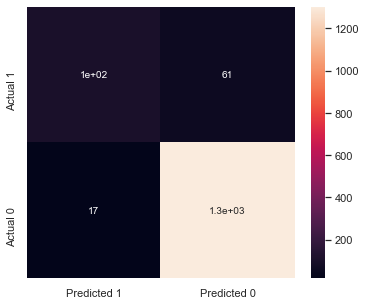

In [90]:
#Confusion matrix
cm=metrics.confusion_matrix(Y_test, Y_predict, labels=[1,0])
df_cm=pd.DataFrame(cm,index= [i for i in ['Actual 1','Actual 0']], columns = [i for i in ['Predicted 1','Predicted 0']])
plt.figure(figsize=(6,5))
sns.heatmap(df_cm, annot=True)

#Performance metrics
print('Accuracy: ',accuracy_score(Y_test,Y_predict))
print('\nRecall: ',recall_score(Y_test,Y_predict))
print('\nPrecision: ',precision_score(Y_test,Y_predict))
print('\nF1 score: ',f1_score(Y_test,Y_predict))
print('\nROC AUC score: ',roc_auc_score(Y_test,Y_predict))


# Find out coefficients of all the attributes and show the output in a data frame with column names. For test data show all the rows where the predicted class is not equal to the observed class.

In [91]:
df_coef = pd.DataFrame()
df_coef['Column'] = X_train.columns
df_coef['Coefficient']=np.round(abs(logreg_model.coef_[0]),2)
df_coef

,Column,Coefficient
0,Age,0.28
1,Experience,0.28
2,Income,0.06
3,CCAvg,0.13
4,Mortgage,0.00
5,Securities Account,0.91
6,CD Account,2.88
7,Online,0.65
8,CreditCard,0.67
9,Education_1,3.12


In [92]:
df_y = pd.DataFrame()
df_y['Y test']=Y_test
df_y['Y predict']=Y_predict
df_y[df_y['Y test']!=df_y['Y predict']]

,Y test,Y predict
2910,1,0
765,1,0
537,1,0
2952,0,1
1177,1,0
...,...,...
896,1,0
1716,0,1
3886,0,1
1994,0,1


# Give conclusion related to the Business understanding of your model?

1. The model is able to make predictions with high accuracy (~95%)
2. Top 3 features:
    Education_1, CD Account, Family_2
3. Bottom 3 features:
    Mortgage, Income, CC Avg
